## Arm Reaching (MI Session 1)

In [1]:
import os
import glob
import numpy as np
import mne
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### BrainVision (.vhdr, .vmrk, .eeg)

The BrainVision file format consists of three separate files:

1. A text header file (.vhdr) containing meta data.

2. A text marker file (.vmrk) containing information about events in the data.

3. A binary data file (.eeg) containing the voltage values of the EEG.

In [2]:
folder_path=r'D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

session1_sub10_reaching_MI.eeg
session1_sub10_reaching_MI.vhdr
session1_sub10_reaching_MI.vmrk
session1_sub1_reaching_MI.eeg
session1_sub1_reaching_MI.vhdr
session1_sub1_reaching_MI.vmrk
session1_sub2_reaching_MI.eeg
session1_sub2_reaching_MI.vhdr
session1_sub2_reaching_MI.vmrk
session1_sub3_reaching_MI.eeg
session1_sub3_reaching_MI.vhdr
session1_sub3_reaching_MI.vmrk
session1_sub4_reaching_MI.eeg
session1_sub4_reaching_MI.vhdr
session1_sub4_reaching_MI.vmrk
session1_sub5_reaching_MI.eeg
session1_sub5_reaching_MI.vhdr
session1_sub5_reaching_MI.vmrk
session1_sub6_reaching_MI.eeg
session1_sub6_reaching_MI.vhdr
session1_sub6_reaching_MI.vmrk
session1_sub7_reaching_MI.eeg
session1_sub7_reaching_MI.vhdr
session1_sub7_reaching_MI.vmrk
session1_sub8_reaching_MI.eeg
session1_sub8_reaching_MI.vhdr
session1_sub8_reaching_MI.vmrk
session1_sub9_reaching_MI.eeg
session1_sub9_reaching_MI.vhdr
session1_sub9_reaching_MI.vmrk


In [3]:
eeg,vhdr,vmrk = [],[],[]

for i in folder_files:
    file=folder_path+'\\'+i
    if '.eeg' in file:
        eeg.append(file) 
    elif '.vhdr' in file:
        vhdr.append(file) 
    else:
        vmrk.append(file)
        
for i in range(0,len(eeg)):
    print(eeg[i]+'\n'+vhdr[i]+'\n'+vmrk[i]+'\n')

D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub10_reaching_MI.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub10_reaching_MI.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub10_reaching_MI.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub1_reaching_MI.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub1_reaching_MI.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub1_reaching_MI.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub2_reaching_MI.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub2_reaching_MI.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub2_reaching_MI.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub3_reaching_MI.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub3_reaching_MI.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub3_reaching_MI.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub4_reaching_MI.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reach

### Read Raw Signals

In [4]:
raw = mne.io.read_raw_brainvision(vhdr[0], misc='auto', scale=1.0, preload=True, verbose=None)
raw # OR raw.info

Extracting parameters from D:\EEG_RawData\EEG_RawData\Arm-Reaching\MI\session1_sub10_reaching_MI.vhdr...
Setting channel info structure...
Reading 0 ... 8487899  =      0.000 ...  3395.160 secs...


<RawBrainVision | session1_sub10_reaching_MI.eeg, 71 x 8487900 (3395.2 s), ~4.49 GB, data loaded>

In [5]:
raw.set_channel_types(mapping={'hEOG_L': 'eog', 'hEOG_R': 'eog', 'vEOG_U': 'eog', 'vEOG_D': 'eog'})
raw.set_channel_types(mapping={'EMG_1': 'emg', 'EMG_2': 'emg', 'EMG_3': 'emg', 'EMG_4': 'emg', 'EMG_5': 'emg', 'EMG_6': 'emg', 'EMG_ref': 'emg'})
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, AFz, F7, F5, F3, F1, Fz, FT7, FC5, FC3, FC1, T7, ...
 chs: 60 EEG, 4 EOG, 7 EMG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2019-07-08 12:11:40 UTC
 nchan: 71
 projs: []
 sfreq: 2500.0 Hz
>

In [6]:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

bad channels: []
2500.0 Hz
None 



Using matplotlib as 2D backend.


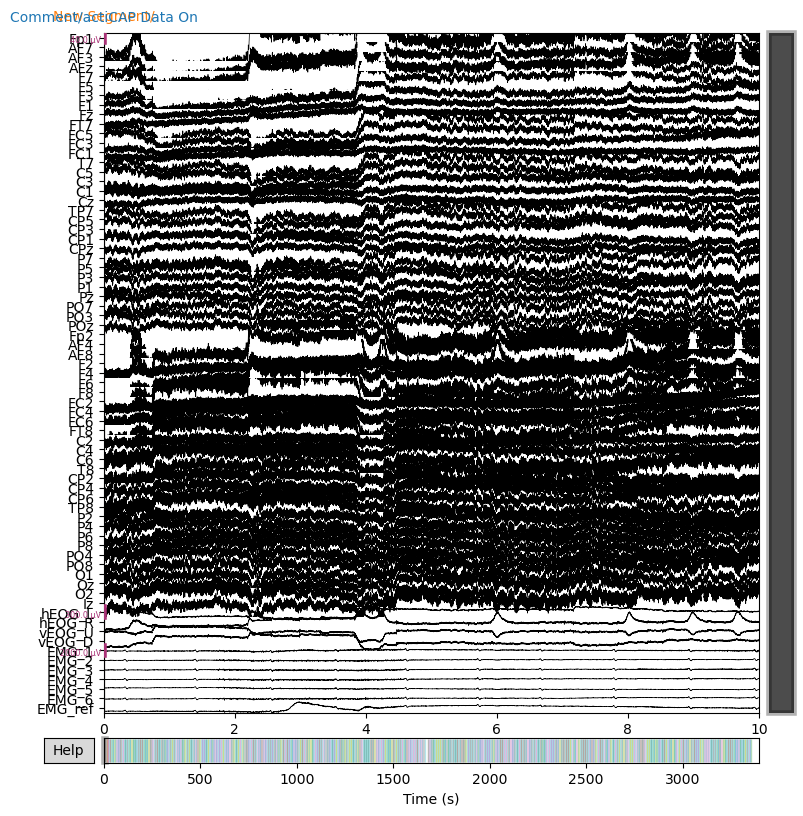

In [7]:
raw.plot(n_channels=71);

### For One Session, Each Subject Do :
 - 50 Trials For Each Class : 50 x 6 ( Classes ) = Total 300 Trials
 
 - Each Trial has Time Duration 7s ( 3s Visual Cue + 4s Movement Implementation )

 - and There Are 300 Rest Periods Between Those Trials ( Each Rest Period has Time Duration 4s )
 
 - Finally,
      Total Session Time = 50 x 6 x 7 + 300 x 4 = almost 3300 seconds 

In [21]:
print('First Time : ',raw.first_time)
print('Last Time  : ',raw._last_time)

First Time :  0.0
Last Time  :  3395.1596


- Therefore, The Total Count of Samples For All Trials : 300 ( Trials ) x 7s x 2500 (Fs) + 300 (Rests) x 4s x 2500 (Fs) is almost 8,250,000

In [8]:
print('Total Samples : ',len(raw))
print('Start : ',raw._first_samps) 
print('End : ',raw._last_samps)

Total Samples :  8487900
Start :  [0]
End :  [8487899]


### time_as_index()
- Convert time to indices ( time ( s ) : index ( 0-based ) )

- Input : List of numbers or a number representing points in time.

- Return : Indices relative to first_samp corresponding to the times supplied.

In [10]:
print(raw.time_as_index([1, 2, 3, 4, 5]), '\n')
print(np.diff(raw.time_as_index([1, 2, 3])))

[ 2500  5000  7500 10000 12500] 

[2500 2500]


### Electrodes Handling :
### pick_types() : Picking Some Type of Signals and Ignore Others.
### pick_channels() : pick channels by name.
### drop_channels() : method to remove channels by name.

In [12]:
# this piece of code does not make changes in this case, only for learn

# eeg_and_eog = raw.copy().pick_types(emg=False, eeg=True, eog=True)
# print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))

### We Will Select Channels According to International Standard 10–20 system 

<img src="The-location-map-of-32-channels-cap-The-electrodes-can-be-divided-into-3-groups.png" style="width:400px;hight:400;"/>

In [9]:
print(raw.ch_names)

['Fp1', 'AF7', 'AF3', 'AFz', 'F7', 'F5', 'F3', 'F1', 'Fz', 'FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'Cz', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'P7', 'P5', 'P3', 'P1', 'Pz', 'PO7', 'PO3', 'POz', 'hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'Fp2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'FC2', 'FC4', 'FC6', 'FT8', 'C2', 'C4', 'C6', 'T8', 'CP2', 'CP4', 'CP6', 'TP8', 'P2', 'P4', 'P6', 'P8', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


In [10]:
selected_channels = ["Fp1", "AF3","F7","F3","FC1","FC5","T7","C3","CP1","CP5","P7","P3", "PO3", "O1",  # Brain Left Side
                     "Fz","Cz","Pz","Oz",                                                              # Brain Mid
                     "O2","FC2","F4","F8","AF4","Fp2","C4", "T8","FC6","CP2","PO4","P4","P8","CP6",    # Brain Right Side   
                     "hEOG_L", "hEOG_R", "vEOG_U", "vEOG_D"]                                           # EOG Channels                                

In [11]:
raw.pick_channels(ch_names=selected_channels)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
print(len(raw.ch_names))

36


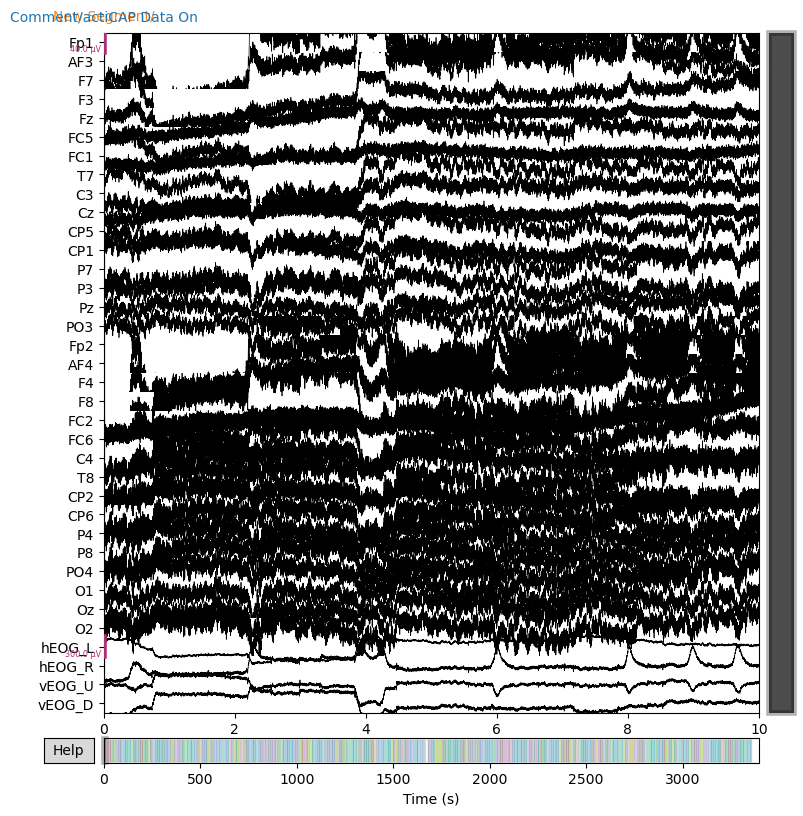

In [12]:
raw.plot(n_channels=36);

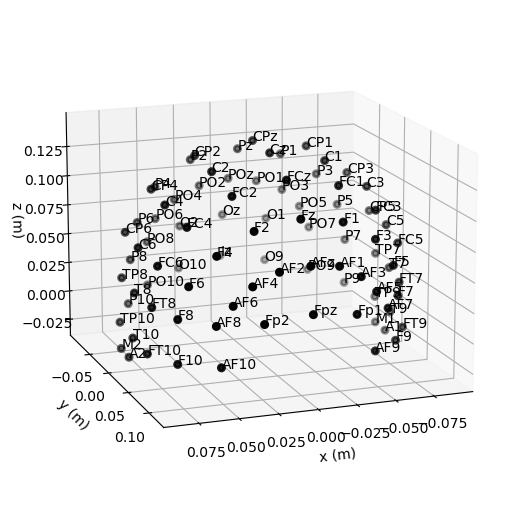

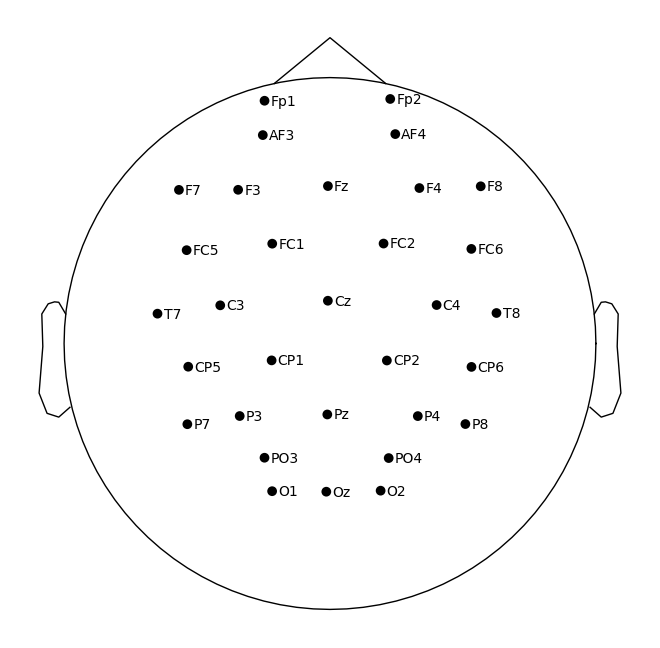

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


In [18]:
raw.plot_sensors(show_names=True,sphere=0.11);
fig = montage.plot(kind='3d',show=False)
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

### Plotting spectral density of continuous data

- To visualize the frequency content of continuous data

- the Raw object provides a compute_psd() method to compute spectral density and the resulting Spectrum object has a plot() method

Effective window size : 0.102 (s)


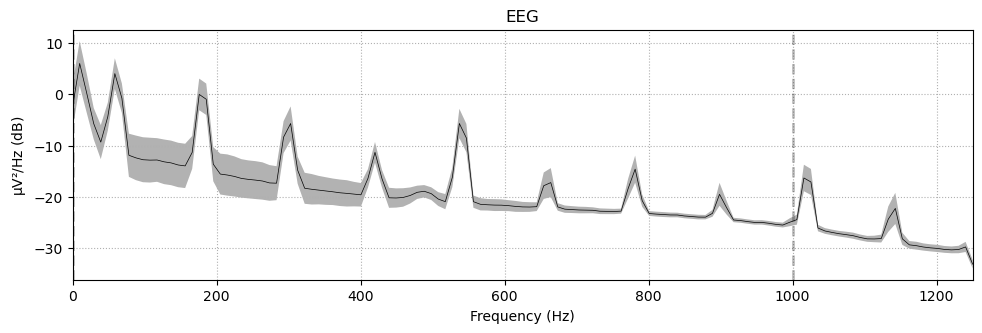

In [13]:
spectrum = raw.compute_psd()
spectrum.plot(average=True)

### plot spectral power estimates across sensors as a scalp topography
- will compute power based on magnetometer channels (if present), and will plot the power estimates on a dB-like log-scale.

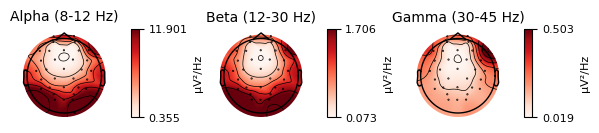

In [15]:
spectrum.plot_topomap(bands={'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),'Gamma (30-45 Hz)': (30,45)});

### plot the PSD for every sensor on its own axes
- the axes arranged spatially to correspond to sensor locations in space.

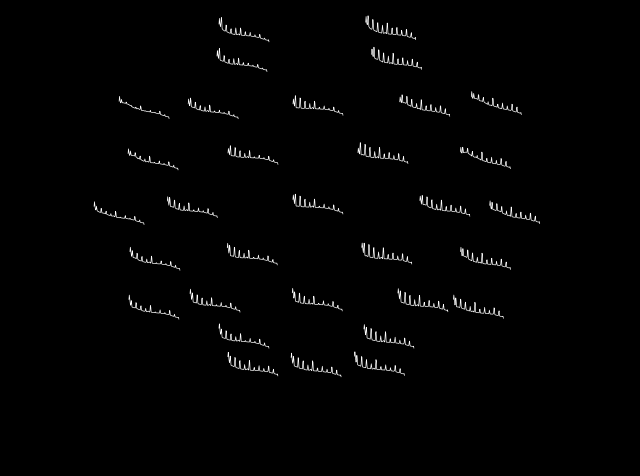

In [16]:
spectrum.plot_topo();

### Bandpass Filtering the Data
- Filtering to remove slow drift.
- Before we run the ICA, an important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit.

In [17]:
# raw.filter(l_freq=8,h_freq=30)

In [18]:
# raw.plot(n_channels=36);

In [19]:
# spectrum = raw.compute_psd()
# spectrum.plot(average=True)

### Refrencing EEG

In [20]:
# # Average reference. This is normally added by default, but can also be added
# # explicitly.
# raw.set_eeg_reference(ref_channels='average')
# raw.plot();

In [3]:
# ### Detect Ocular artifacts (EOG)

# - MNE-Python includes functions for detecting and extracting ocular artifacts: find_eog_events() and create_eog_epochs(). Once again we’ll use the higher-level convenience function that automatically finds the artifacts and extracts them in to an Epochs object in one step. 

# - ocular artifacts are usually most prominent in the EEG channels.

# - note that there are many fewer blinks than heartbeats, which makes the image plots appear somewhat blocky.

In [26]:
# # baseline : The electrical signal from a sensor when no measured variable is present. Often referred to the output at no-load condition
# eog_epochs = mne.preprocessing.create_eog_epochs(raw,ch_name=["hEOG_L", "hEOG_R", "vEOG_U", "vEOG_D"], baseline=(-0.5, -0.2))
# eog_epochs.plot_image(combine='mean');
# eog_epochs.average().plot_joint();

In [1]:
# eog_epochs

In [4]:
# ### Repairing artifacts with regression --Raw Data--
# Remove EOG artifact signals from other channels by regression.

In [28]:
# weights = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(raw)

In [29]:
# fig = weights.plot(vlim=(None, 0.4))  # regression coefficients / weights as topomap
# fig.set_size_inches(3, 2)

In [30]:
# # Fit the regression model
# raw_clean = weights.apply(raw, copy=False)

# # Show the filter weights in a topomap
# weights.plot();

In [5]:
# ### Repairing artifacts with ICA
# Note : ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this tutorial is built by our web servers

In [31]:
# ica = mne.preprocessing.ICA(n_components=32, max_iter='auto',random_state=0,method='infomax')
# ica.fit(raw.copy()) 

In [33]:
# ica.plot_components();

In [34]:
# # use automatic detection
# bad_indx,scores = ica.find_bads_eog(raw,ch_name=["hEOG_L","hEOG_R","vEOG_U","vEOG_D"],threshold=3,)
# print(bad_indx)

In [35]:
# raw.plot(n_channels=32);

In [36]:
# ica.exclude = bad_indx
# ica.apply(raw.copy(),exclude=ica.exclude).plot();

In [ ]:
# ica.apply(raw,exclude=ica.exclude)

### Read Events & Epoching

In [21]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']


In [22]:
list(events[0])

[array([    0,     0, 99999]),
 array([    0,     0, 10001]),
 array([38900,     0,    13]),
 array([48973,     0,     4]),
 array([56489,     0,    41]),
 array([66533,     0,     8]),
 array([76625,     0,     3]),
 array([84137,     0,    31]),
 array([94176,     0,     8]),
 array([104251,      0,      1]),
 array([111762,      0,     11]),
 array([121801,      0,      8]),
 array([131884,      0,      6]),
 array([139394,      0,     61]),
 array([149441,      0,      8]),
 array([159529,      0,      2]),
 array([167039,      0,     21]),
 array([177079,      0,      8]),
 array([187159,      0,      2]),
 array([194669,      0,     21]),
 array([204708,      0,      8]),
 array([214780,      0,      3]),
 array([222290,      0,     31]),
 array([232331,      0,      8]),
 array([242410,      0,      4]),
 array([249920,      0,     41]),
 array([259961,      0,      8]),
 array([270034,      0,      1]),
 array([277544,      0,     11]),
 array([287588,      0,      8]),
 array(

In [23]:
selected_events = mne.pick_events(events[0], exclude=[99999,10001,10002,10003,1,2,3,4,5,6,13,14])
selected_events

array([[  56489,       0,      41],
       [  66533,       0,       8],
       [  84137,       0,      31],
       ...,
       [8348332,       0,       8],
       [8365912,       0,      21],
       [8375951,       0,       8]])

In [24]:
selected_events.shape

(600, 3)

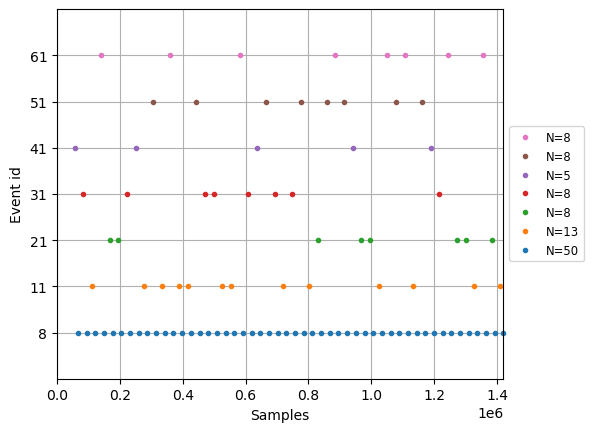

In [25]:
mne.viz.plot_events(selected_events[:100]);

In [49]:
event_ids = {'Stimulus/S 11': 11,'Stimulus/S 21': 21,'Stimulus/S 31': 31,'Stimulus/S 41': 41,'Stimulus/S 51': 51,'Stimulus/S 61': 61}
epochs = mne.Epochs(raw, events=selected_events, event_id=event_ids, tmin=0, tmax=7, preload=True,baseline=(0, 0))

Not setting metadata
300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 17501 original time points ...
0 bad epochs dropped


In [50]:
epochs

Number of events,300
Events,Stimulus/S 11: 50Stimulus/S 21: 50Stimulus/S 31: 50Stimulus/S 41: 50Stimulus/S 51: 50Stimulus/S 61: 50
Time range,0.000 – 7.000 sec
Baseline,0.000 – 0.000 sec


In [51]:
epochs.get_data().shape

(300, 36, 17501)

In [52]:
epochs.crop(tmin=3,tmax=7,include_tmax=True)
epochs.get_data().shape

(300, 36, 10001)

In [37]:
# rest_epochs = mne.Epochs(raw, events=selected_events, event_id={'Stimulus/S 8': 8}, tmin=0, tmax=4, preload=True,baseline=(0, 0))
# print('=' * 40)
# rest_epochs.get_data().shape

### Epochs Downsampling 

In [53]:
epochs.resample(sfreq=1250)
epochs.get_data().shape

(300, 36, 5000)

In [39]:
# rest_epochs.resample(sfreq=1250)
# rest_epochs.get_data().shape

In [40]:
# epochs.plot(n_epochs=5);

In [41]:
# rest_epochs.plot(n_epochs=5);

### Repairing artifacts with ICA 
Note : ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this tutorial is built by our web servers

### First ,  on main classes epochs

In [32]:
# ica = mne.preprocessing.ICA(n_components=20, max_iter='auto',random_state=0,method='infomax')
# ica.fit(epochs.copy()) 

In [33]:
# ica.plot_components();

In [34]:
# # use automatic detection
# bad_indx,scores = ica.find_bads_eog(raw,ch_name=["hEOG_L","hEOG_R","vEOG_U","vEOG_D"],threshold=2)
# print(bad_indx)

In [35]:
# epochs.plot(n_epochs=5);

In [36]:
# ica.exclude = bad_indx
# ica.apply(epochs.copy(),exclude=ica.exclude).plot(n_epochs=5);

In [37]:
# ica.apply(epochs,exclude=ica.exclude)

### Second ,  on rest_epochs

In [48]:
# ica = mne.preprocessing.ICA(n_components=20, max_iter='auto',random_state=0,method='fastica')
# ica.fit(rest_epochs.copy()) 

In [49]:
# ica.plot_components();

In [50]:
# # use automatic detection
# bad_indx,scores = ica.find_bads_eog(raw,ch_name=["hEOG_L","hEOG_R","vEOG_U","vEOG_D"],threshold=2)
# print(bad_indx)

In [51]:
# rest_epochs.plot(n_epochs=5);

In [52]:
# ica.exclude = [2,3,6,13,0,19]
# ica.apply(epochs.copy(),exclude=ica.exclude).plot(n_epochs=5);

In [53]:
# ica.apply(rest_epochs,exclude=ica.exclude)

### Repairing artifacts with regression 
Remove EOG artifact signals from other channels by regression.

In [66]:
# # plotting before
# # plot the evoked for the EEG and the EOG sensors
# fig = epochs.average('all').plot()
# fig.set_size_inches(6, 6)

In [67]:
# # Perform regression using the EOG sensor as independent variable and the EEG
# # sensors as dependent variables.
# model_plain = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs)
# fig = model_plain.plot(vlim=(None, 0.4))  # regression coefficients as topomap
# fig.set_size_inches(3, 2);

In [68]:
# epochs_clean_plain = model_plain.apply(epochs)
# # After regression, we should redo the baseline correction
# epochs_clean_plain.apply_baseline(baseline=(3, 7))
# # Show the evoked potential computed on the corrected data
# fig = epochs_clean_plain.average('all').plot()
# fig.set_size_inches(6, 6)

In [69]:
# # create epochs with the evoked subtracted out
# epochs_sub = epochs.copy().subtract_evoked()

# # perform regression
# model_sub = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs_sub)
# fig = model_sub.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)

# # apply the regression coefficients to the original epochs
# epochs_clean_sub = model_plain.apply(epochs).apply_baseline(baseline=(3, 7))
# fig = epochs_clean_sub.average('all').plot()
# fig.set_size_inches(6, 6)

In [70]:
# eog_epochs = mne.preprocessing.create_eog_epochs(raw)
# # We need to explicitly specify that we want to average the EOG channel too.
# eog_evoked = eog_epochs.average('all')
# eog_evoked.plot('all')
# fig.set_size_inches(6, 6)

# # perform regression on the evoked blink response
# model_evoked = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(eog_evoked)
# fig = model_evoked.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)

# # apply the regression coefficients to the original epochs
# epochs_clean_evoked = model_evoked.apply(epochs).apply_baseline(baseline=(3, 7))
# fig = epochs_clean_evoked.average('all').plot()
# fig.set_size_inches(6, 6)

# # for good measure, also show the effect on the blink evoked
# eog_evoked_clean = model_evoked.apply(eog_evoked)
# eog_evoked_clean.apply_baseline(baseline=(0, 0))
# eog_evoked_clean.plot('all')
# fig.set_size_inches(6, 6)

In [71]:
# order = np.concatenate([  # plotting order: EOG first, then EEG
#     mne.pick_types(raw.info, meg=False, eog=True),
#     mne.pick_types(raw.info, meg=False, eeg=True),
# ])
# raw_kwargs = dict(events=eog_epochs.events, order=order, start=13, duration=3,
#                   n_channels=10, scalings=dict(eeg=50e-6, eog=250e-6))

# # plot original data
# raw.plot(**raw_kwargs);

# # regress (using coefficients computed previously) and plot
# raw_clean = model_evoked.apply(raw)
# raw_clean.plot(**raw_kwargs);

In [40]:
# epochs.apply_baseline((None,0))

In [41]:
# epochs["Stimulus/S 41"].plot_image(picks=[5]); # picks=[channel index]

In [ ]:
# epochs.equalize_event_counts(event_ids)
# epochs

### DWT

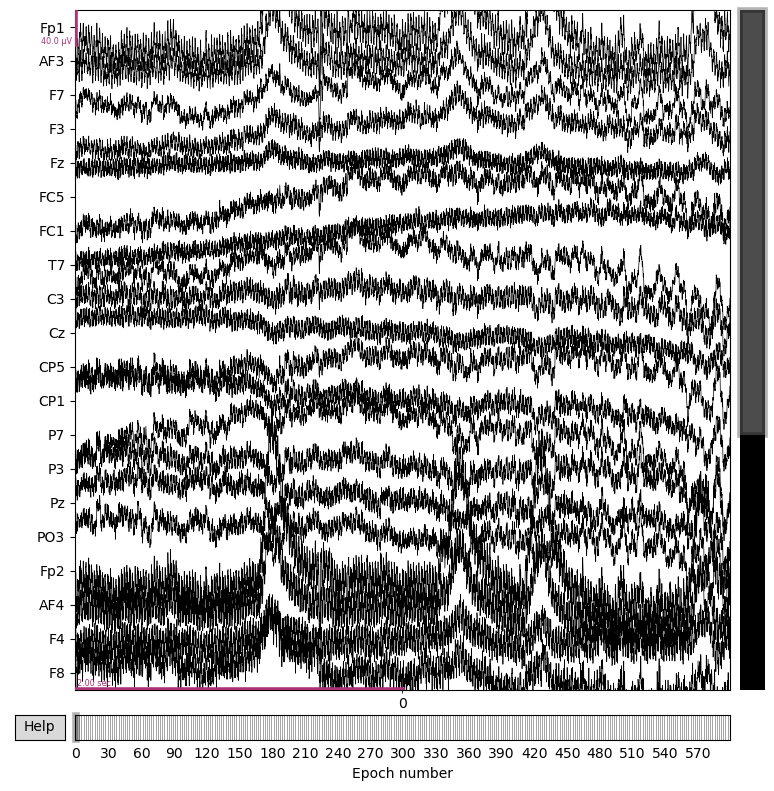

In [54]:
epochs.plot(n_epochs=1);

In [86]:
import pywt
from pywt import wavedec
coeffs = wavedec(epochs, 'db4' , level=5)
len(coeffs)

6

In [87]:
coeffs_ = np.array(coeffs[5])
coeffs_.shape

(300, 36, 2503)

In [93]:
mean_amplitude = np.mean(coeffs_)

### data in time domain

In [87]:
epochs.pick_types(eeg=True)
data = epochs.get_data()
# rest_epochs.pick_types(eeg=True)
# classes_data = epochs.get_data()
# rest_data = rest_epochs.get_data()

In [74]:
# data = np.empty(shape=(600,32,5000))
# data[0:300] = classes_data
# data[300:600] = rest_data

In [88]:
labels = np.empty(shape=(300))
decode = {11: 0, 21: 1, 31: 2, 41:3, 51: 4, 61: 5, 8 :6}
k=0
for i in epochs.events:
    labels[k]=decode[i[2]]
    k+=1

In [89]:
data.shape

(300, 32, 5000)

In [90]:
# for i in range(300,600):
#     labels[i] = 6
labels.shape

(300,)

In [91]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2,stratify=labels,shuffle=True)

In [83]:
# ind = np.argsort(y_train)
# y_train = y_train[ind]
# X_train = X_train[ind]

In [84]:
# ind = np.argsort(y_val)
# y_val = y_val[ind]
# X_val = X_val[ind]

In [92]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=6) 
y_val=tf.keras.utils.to_categorical(y_val,num_classes=6) 

In [93]:
# Normaliation
# X_train = MinMaxScaler().fit_transform(X_train)
# X_val = MinMaxScaler().fit_transform(X_val)
# X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
# X_val = (X_val-np.min(X_val))/(np.max(X_val)-np.min(X_val))

In [90]:
# def preprocess_input(eeg_signals):
#     eeg_signals_3d = np.zeros((eeg_signals.shape[0], 32, 2500, 3))
#     for i in range(eeg_signals.shape[0]):
#         trial_3d = np.dstack([eeg_signals[0],eeg_signals[0],eeg_signals[0]])
#         eeg_signals_3d[i] = trial_3d
#     return eeg_signals_3d
# X_train = preprocess_input(X_train)
# X_val = preprocess_input(X_val)

In [94]:
print('X_train: ',X_train.shape)
print('X_val:   ',X_val.shape)
print('y_train: ',y_train.shape)
print('y_val:   ',y_val.shape)

X_train:  (240, 32, 5000)
X_val:    (60, 32, 5000)
y_train:  (240, 6)
y_val:    (60, 6)


## Model CNN

In [95]:
from EEGModels import EEGNet 
model = EEGNet(nb_classes=6, Chans = 32, Samples = 5000, dropoutRate = 0.2, kernLength = 64, F1 = 8, D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

In [96]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.,
  metrics=['accuracy'])

In [152]:
# model = tf.keras.models.load_model('model.h5')

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 10001, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 32, 10001, 8)      512       
                                                                 
 batch_normalization (BatchN  (None, 32, 10001, 8)     32        
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 1, 10001, 16)     512       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 1, 10001, 16)     64        
 hNormalization)                                                 
                                                             

In [97]:
Epochs=40
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                     batch_size=32,
                     verbose=1)         #,callbacks=[early_stopping]

Epoch 1/40
8/8 [==============================] - 20s 2s/step - loss: 1.9039 - accuracy: 0.1583 - val_loss: 1.7948 - val_accuracy: 0.1667
Epoch 2/40
8/8 [==============================] - 19s 2s/step - loss: 1.8801 - accuracy: 0.2083 - val_loss: 1.8011 - val_accuracy: 0.1667
Epoch 3/40
8/8 [==============================] - 18s 2s/step - loss: 1.6795 - accuracy: 0.3583 - val_loss: 1.8015 - val_accuracy: 0.1667
Epoch 4/40
8/8 [==============================] - 18s 2s/step - loss: 1.5595 - accuracy: 0.4042 - val_loss: 1.7979 - val_accuracy: 0.1667
Epoch 5/40
8/8 [==============================] - 17s 2s/step - loss: 1.4129 - accuracy: 0.5292 - val_loss: 1.7977 - val_accuracy: 0.1667
Epoch 6/40
8/8 [==============================] - 18s 2s/step - loss: 1.3376 - accuracy: 0.6208 - val_loss: 1.7984 - val_accuracy: 0.1667
Epoch 7/40
8/8 [==============================] - 17s 2s/step - loss: 1.2771 - accuracy: 0.6833 - val_loss: 1.7993 - val_accuracy: 0.1333
Epoch 8/40
8/8 [==================

In [173]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

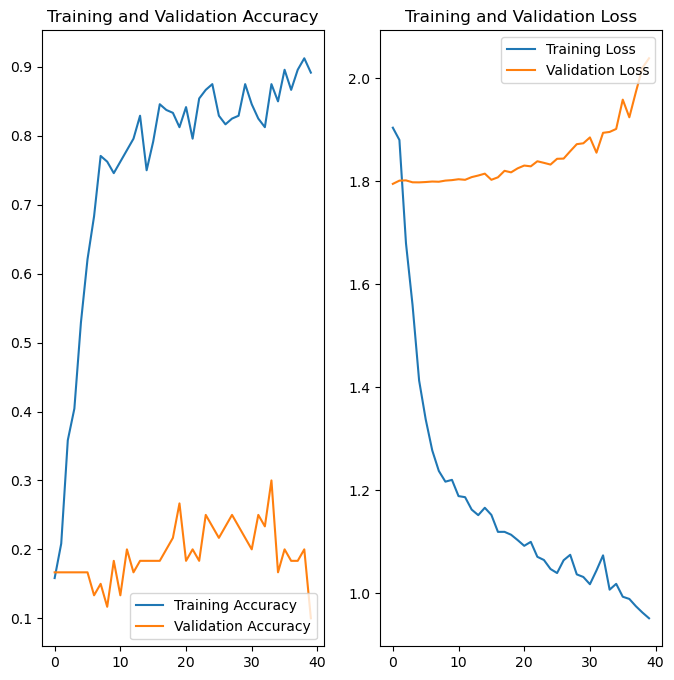

In [98]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [99]:
model.evaluate(X_train,y_train)

8/8 [==============================] - 1s 169ms/step - loss: 1.4888 - accuracy: 0.6083


[1.4888027906417847, 0.6083333492279053]

In [100]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 171ms/step - loss: 2.0388 - accuracy: 0.1000


[2.038753032684326, 0.10000000149011612]

In [159]:
model.save('model.h5')

## Model 2 

In [67]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(32,10001)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [68]:
model2.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [69]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 64)            1920256   
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 15, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 13, 128)           24704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 256)            98560     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 2, 256)          

In [78]:
Epochs=40
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model2.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                     batch_size=32,
                     verbose=1)         #,callbacks=[early_stopping]

Epoch 1/40
8/8 [==============================] - 1s 127ms/step - loss: 1.7921 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/40
8/8 [==============================] - 1s 99ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/40
8/8 [==============================] - 1s 94ms/step - loss: 1.7920 - accuracy: 0.1625 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/40
8/8 [==============================] - 1s 99ms/step - loss: 1.7920 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/40
8/8 [==============================] - 1s 92ms/step - loss: 1.7922 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/40
8/8 [==============================] - 1s 92ms/step - loss: 1.7920 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1500
Epoch 7/40
8/8 [==============================] - 1s 92ms/step - loss: 1.7923 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 8/40
8/8 [==========

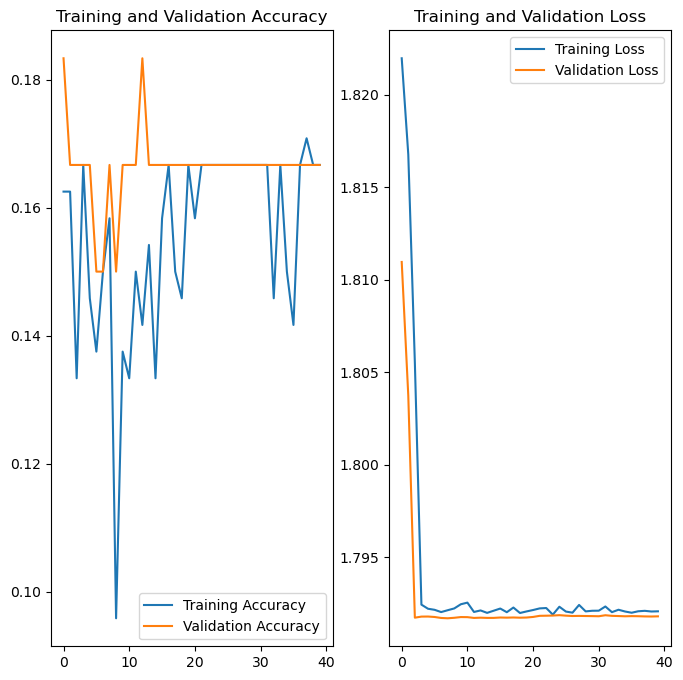

In [72]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
model2.evaluate(X_train,y_train)

8/8 [==============================] - 0s 26ms/step - loss: 1.7918 - accuracy: 0.1667


[1.7918027639389038, 0.1666666716337204]

In [77]:
model2.evaluate(X_val,y_val)

2/2 [==============================] - 0s 22ms/step - loss: 1.7918 - accuracy: 0.1667


[1.7918095588684082, 0.1666666716337204]

## Model 3

In [75]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 10001, 3),
)

In [96]:
model = tf.keras.models.Sequential([
    ResNet50,
    # tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [97]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 79, 2048)       23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 25,692,038
Trainable params: 25,638,918
Non-trainable params: 53,120
_________________________________________________________________


In [99]:
Epochs=40
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    batch_size=32,
                    verbose=1)#,callbacks=[early_stopping]

Epoch 1/100


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000028802783940>
Traceback (most recent call last):
  File "c:\Users\mohamed\anaconda3-folder\anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 
